In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview

In [6]:
city_csvpath = "data/city_data.csv"
ride_csvpath = "data/ride_data.csv"
city_data = pd.read_csv(city_csvpath)
ride_data = pd.read_csv(ride_csvpath)
pyber_data = pd.merge(city_data, ride_data, how="right", on=["city", "city"])
pyber_data = pyber_data[["city", "date", "fare", "ride_id", "driver_count", "type"]]
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

C:\Users\pabun\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


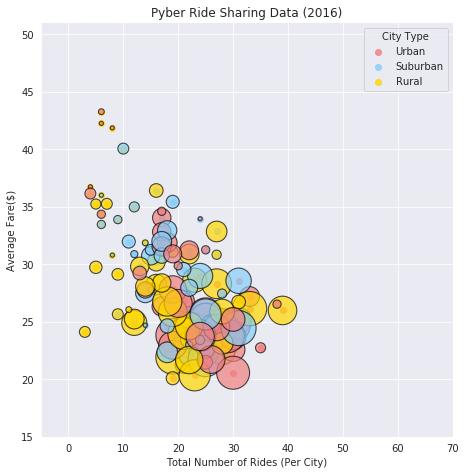

In [7]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
# Create bubble chart that showcase relationships between average fare, total rides, and total drivers per city
# Calculate the average fare ($) per city
cities_avg_fare = pyber_data.groupby("city").mean()["fare"]
# Total number of rides per city
cities_total_rides = pyber_data.groupby("city").count()["ride_id"]
# Create Data Frame with total number of drivers per city and city type
# Do loc to get rid of duplicates 
cities_types = pyber_data.loc[:, ["city", "type", "driver_count"]]
cities_types = cities_types.drop_duplicates()
# Create new Data Frame and set index to city
cities_df = cities_types.set_index("city")
# Add average fares and total rides to cities_df
cities_df["Average Fare"] = cities_avg_fare
cities_df["Total Rides"] = cities_total_rides
# Rename type and driver_count columns to City Type and Driver Count
cities_df = cities_df.rename(columns={"type": "City Type", "driver_count": "Total Drivers"})
# Reorder columns
cities_df = cities_df[["Average Fare", "Total Rides", "Total Drivers", "City Type"]]
cities_df.head()

# Create bubble plot
with sns.axes_style("darkgrid"):
    sns.lmplot(data=cities_df, x="Total Rides", y="Average Fare", fit_reg=False, hue="City Type", 
               palette=("lightcoral", "lightskyblue", "gold"), legend_out=False, size=6.5)
# Axes    
x_axis = cities_df["Total Rides"]
y_axis = cities_df["Average Fare"]
z_axis = cities_df["Total Drivers"]
colors = ["gold", "lightskyblue", "lightcoral"]
# Plot configurations
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.xlim(-5, 70)
plt.ylim(15, 51)
plt.grid(True)
# Plot
plt.scatter(x_axis, y_axis, s=z_axis*17, alpha=0.7, c=colors, linewidth=1.1, edgecolor="black")
plt.show()

## Total Fares by City Type

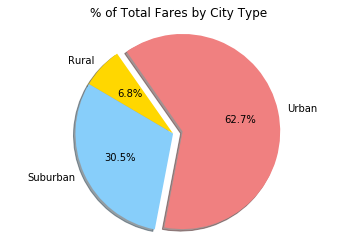

In [8]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure
# Do group by city type
group_city_type = pyber_data.groupby("type").sum()
# Calculate the sum of all fares
total_fare = group_city_type["fare"].sum()
# Find sum of rural fare with loc
rural_fare = group_city_type.loc["Rural", "fare"]
# Divide rural fare by total fare to get percentage
rural_fare_percent = rural_fare / total_fare
# Find sum of suburb fare with loc
suburb_fare = group_city_type.loc["Suburban", "fare"]
# Divide suburb fare by total fare to get percentage
suburb_fare_percent = suburb_fare / total_fare
# Find sum of urban fare with loc
urban_fare = group_city_type.loc["Urban", "fare"]
# Divide urban fare by total fare
urban_fare_percent = urban_fare / total_fare
# Create lists for pie chart
city_types = ["Rural", "Suburban", "Urban"]
fare_percent = [rural_fare_percent, suburb_fare_percent, urban_fare_percent]
colors = ["gold", "lightskyblue", "lightcoral"]
explode= (0, 0, 0.1)
# Plot pie chart
plt.pie(fare_percent, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=125)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


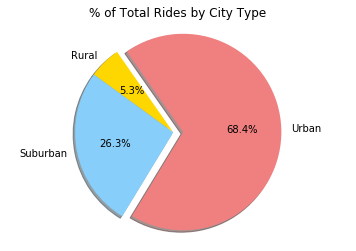

In [9]:
# Show Figure
# Create a pie chart for % of total rides by city type
# Do group by city type
rides_city_type = pyber_data.groupby(["type"]).count()
# Calculate total rides
total_rides = rides_city_type["ride_id"].sum()
# Find rural total rides with loc
rural_rides = rides_city_type.loc["Rural", "ride_id"]
# Divide rural total rides by total rides to get percentage
rural_rides_percent = rural_rides / total_rides
# Find suburb total ride with loc
suburb_rides = rides_city_type.loc["Suburban", "ride_id"]
# Divide suburb total rides with total rides to get percentage
suburb_rides_percent = suburb_rides / total_rides
# Find urban total rides
urban_rides = rides_city_type.loc["Urban", "ride_id"]
# Divide urban total rides with total rides to get percentage
urban_rides_percent = urban_rides / total_rides
# Create lists for pie chart
city_types = ["Rural", "Suburban", "Urban"]
rides_percent = [rural_rides_percent, suburb_rides_percent, urban_rides_percent]
colors = ["gold", "lightskyblue", "lightcoral"]
explode= (0, 0, 0.1)
#Plot pie chart
plt.pie(rides_percent, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=125)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

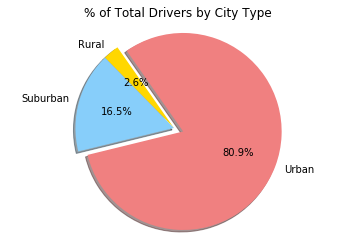

In [10]:

total_drivers_type = cities_types.groupby("type").sum()
# Calculate total drivers
total_drivers = total_drivers_type.sum()["driver_count"]
# Calculate total rural drivers
rural_drivers= total_drivers_type.loc["Rural", "driver_count"]
# Divide rural total drivers by total drivers to get percentage
rural_drivers_percent = rural_drivers / total_drivers
# Calculate total suburb drivers
suburb_drivers = total_drivers_type.loc["Suburban", "driver_count"]
# Divide suburb total drivers by total drivers to get percentage
suburb_drivers_percent = suburb_drivers / total_drivers
# Calculate total urban drivers
urban_drivers = total_drivers_type.loc["Urban", "driver_count"]
# Divide urban total drivers by total drivers to get percentage
urban_drivers_percent = urban_drivers / total_drivers
# Create lists for pie chart
city_types = ["Rural", "Suburban", "Urban"]
drivers_percent = [rural_drivers_percent, suburb_drivers_percent, urban_drivers_percent]
colors = ["gold", "lightskyblue", "lightcoral"]
explode= (0, 0, 0.1)
# Plot pie chart
plt.pie(drivers_percent, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=125)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.show()